In [481]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from Hamster39 import myHamster

In [482]:
myHamster

<function Hamster39.myHamster(Xs, Xg, Id)>

# Question 1

In [483]:
hamster = np.vectorize(myHamster)

In [484]:
X_g = 1
X_s = [1]
u_X_s = [1]

In [485]:
for i in range(1, 6):
    X_i_s = np.linspace(0, X_g)[hamster(np.linspace(0, X_g), X_g, 758).sum()]
    X_s.append(X_i_s)
    u_X_s.append(u_X_s[i-1] * 0.5)
    X_g = X_i_s

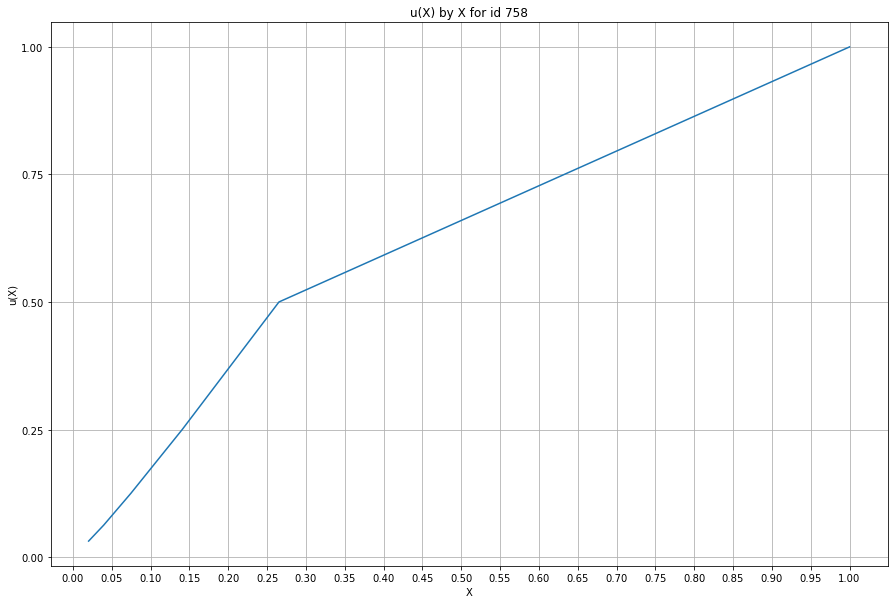

In [486]:
plt.figure(figsize=(15, 10))
plt.plot(X_s, u_X_s)
plt.title("u(X) by X for id 758")
plt.xlabel("X")
plt.ylabel("u(X)")
plt.xticks(np.arange(0, 1.01, 0.05))
plt.yticks(np.arange(0, 1.01, 0.25))
plt.grid()
plt.show()


# Question 2

In [487]:
class Constants:
    pi = "\u03C0"
    alpha = "\u03B1"
    sigma = "\u03C3"

## Section 1

In [518]:
p = np.arange(start=0.0, stop=1, step=0.005)
params = [0.6, 1, 2.4]
signs = ["<", "=", ">"]

C:\Users\T-NWEI~1\AppData\Local\Temp/ipykernel_36716/930056585.py:3: RuntimeWarning: divide by zero encountered in log
  pi = np.exp(-((-np.log(p)) ** params[i]))
C:\Users\T-NWEI~1\AppData\Local\Temp/ipykernel_36716/930056585.py:3: RuntimeWarning: divide by zero encountered in log
  pi = np.exp(-((-np.log(p)) ** params[i]))
C:\Users\T-NWEI~1\AppData\Local\Temp/ipykernel_36716/930056585.py:3: RuntimeWarning: divide by zero encountered in log
  pi = np.exp(-((-np.log(p)) ** params[i]))


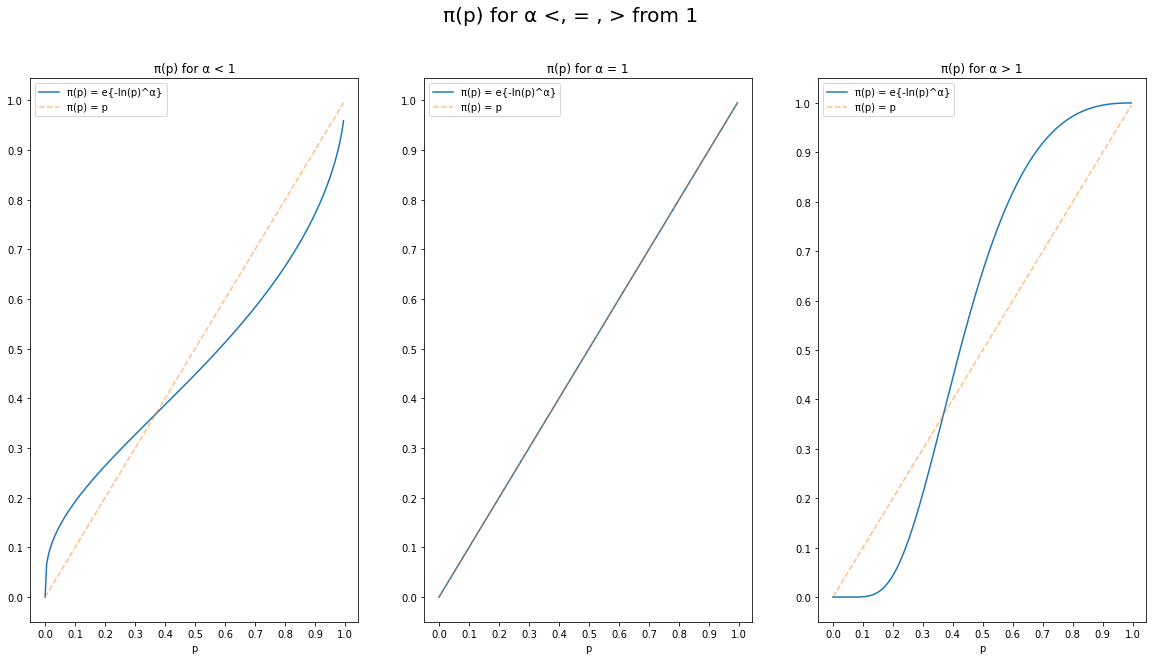

In [519]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for i in range(len(params)):
    pi = np.exp(-((-np.log(p)) ** params[i]))

    ax[i].plot(p, pi, label=Constants.pi + "(p) = e{-ln(p)^" + Constants.alpha + "}")
    ax[i].set_title(label=Constants.pi + "(p) for " + Constants.alpha + " " + signs[i] + " 1")
    ax[i].set_xlabel("p")
    ax[i].plot(p, p, linestyle="--", alpha=0.5, label=Constants.pi + "(p) = p")
    ax[i].set_xticks(np.arange(0, 1.01, step=0.1))
    ax[i].set_yticks(np.arange(0, 1.01, step=0.1))
    ax[i].legend()

fig.suptitle(Constants.pi + "(p) for " + Constants.alpha + " <, = , > from 1", fontsize=20)
plt.show()


הפרמטר אלפא משפיע על הנטהה להמר:
עבור אלפא קטן מ1 קיימות הערכת יתר של הסתברויות נמוכות והערכת חסר של הסתברויות גבוהות, מה שמתאים לתיאוריית הפרספקט. 
עבור אלפא שווה ל1 אין הסתברויות יתר או חסר, אלא הנטייה לאכול נקבעת ישירות ע"י ההסתברות האמיתית להשיג את הבוטנים
עבור אלפא גדול מ1 ישנן הערכת יתר של הסתברויות גבוהות והערכת חסר של הסתברויות נמוכות.


## Section 2

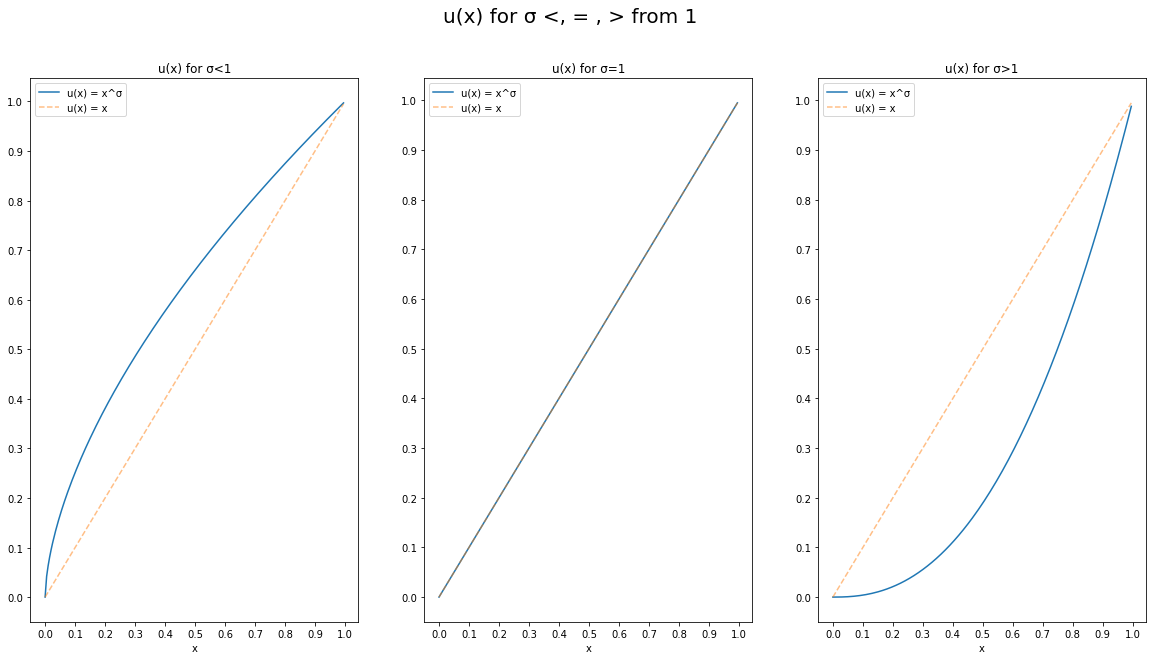

In [520]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for i in range(len(params)):
    u_x = p ** params[i]

    ax[i].plot(p, u_x, label="u(x) = x^" + Constants.sigma)
    ax[i].set_title("u(x) for "+ Constants.sigma + signs[i] + "1")
    ax[i].set_xlabel("x")
    ax[i].plot(p, p, linestyle="--", alpha=0.5, label="u(x) = x")
    ax[i].set_xticks(np.arange(0, 1.01, step=0.1))
    ax[i].set_yticks(np.arange(0, 1.01, step=0.1))
    ax[i].legend()

fig.suptitle("u(x) for " + Constants.sigma + " <, = , > from 1", fontsize=20)
plt.show()


הפרמטר סיגמא משפיע על הנטהה להמר:
עבור סיגמא קטן מ1 יש מתקיימת הערכת יתר. 
עבור אלפא שווה ל1 אין הסתברויות יתר או חסר, אלא הנטייה לאכול נקבעת ישירות ע"י ההסתברות האמיתית להשיג את הבוטנים
עבור אלפא גדול מ1 ישנן מתקיימת הערכת חסר.


## Section 4

In [491]:
experiment = pd.DataFrame()
mat = loadmat("ex9_q2_data.mat")

In [492]:
for key in mat:
    if type(mat[key]) == type(np.zeros((2, 3))):
        experiment = pd.concat([experiment, pd.DataFrame(
            mat[key].reshape(-1), columns=[key])], axis=1)

experiment.head()

,subject,choice,p,h,Xs,Xg
0,1,1,70.0,2,50,150
1,1,2,70.0,2,100,150
2,1,1,90.0,1,133,400
3,1,2,70.0,2,66,150
4,1,2,10.0,2,167,500


In [493]:
experiment["p"] = experiment["p"].apply(lambda p: p / 100)
experiment["choice"] = experiment["choice"].map({2: "s", 1: "g"})
experiment.head()

,subject,choice,p,h,Xs,Xg
0,1,g,0.7,2,50,150
1,1,s,0.7,2,100,150
2,1,g,0.9,1,133,400
3,1,s,0.7,2,66,150
4,1,s,0.1,2,167,500


In [494]:
Xg_p = {}
for Xg, p in experiment[['Xg', 'p']].drop_duplicates().set_index("Xg").itertuples():
    Xg_p[Xg] = p
Xg_p

{150: 0.7, 400: 0.9, 500: 0.1, 700: 0.55, 5000: 0.99, 10000: 0.002, 2000: 0.06}

In [495]:
results = experiment.groupby(["subject", "h", "Xg", "choice"]).agg({"Xs": lambda x: x.tolist()}).transpose()
results.head()

subject        1                                                    \
h               1                                                    
Xg          150                                              400     
choice          g                          s                     g   
Xs       [50, 50]  [100, 66, 83, 54, 60, 52]  [133, 147, 162, 167]   

subject                                                               \
h                                                                      
Xg                                500                                  
choice                      s         g                            s   
Xs       [266, 177, 222, 172]  [18, 37]  [167, 333, 56, 112, 43, 50]   

subject                                                    \
h                                                           
Xg              700                                 2000    
choice              g                        s          g   
Xs       [25, 51, 59]  [233, 467, 77, 155, 68]  [147, 22]   

subject                                 ...                         30  \
h                                       ...                          2   
Xg                                      ...                      400     
choice                               s  ...                          s   
Xs       [666, 1333, 221, 444, 72, 47]  ...  [266, 237, 252, 227, 232]   

subject                                                                        \
h                                                                               
Xg                       500                                            700     
choice                       g               s                              g   
Xs       [112, 18, 37, 43, 50]  [167, 333, 56]  [77, 155, 181, 207, 215, 224]   

subject                                                         \
h                                                                
Xg                      2000                                     
choice            s         g                                s   
Xs       [233, 467]  [72, 97]  [666, 1333, 221, 444, 147, 122]   

subject                                                      \
h                                                             
Xg                    5000                                    
choice                    g                               s   
Xs       [1667, 3333, 3888]  [4444, 4073, 4259, 3949, 4011]   

subject                                                
h                                                      
Xg                                              10000  
choice                                              s  
Xs       [3333, 6666, 1111, 2222, 370, 741, 122, 246]  

[1 rows x 780 columns]

In [496]:
def get_X_s(row, Xg):
    if len(row.index) == 2:
        return np.mean([np.min(row['s']), np.max(row['g'])])
    elif 's' in row.index:
        return np.mean([0, np.min(row['s'])])
    else:
        return np.mean([Xg, np.max(row['g'])])


In [497]:
processing = pd.Series()
df = pd.DataFrame()
h_options = [1, 2]
subjects_count = 30

C:\Users\T-NWEI~1\AppData\Local\Temp/ipykernel_36716/426828784.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  processing = pd.Series()


In [498]:
for i in range(1, subjects_count + 1):
    for h in h_options:
        for Xg in Xg_p.keys():
            Xs = results[i, h, Xg].apply(
                lambda row: get_X_s(row, Xg), axis=1)
            df = pd.concat([df, pd.DataFrame(
                [[i, h, Xg, Xs.values[0]]], columns=['subject', 'h', 'Xg', 'Xs'])])
df.head()


,subject,h,Xg,Xs
0,1,1,150,51.0
0,1,1,400,169.5
0,1,1,500,40.0
0,1,1,700,63.5
0,1,1,5000,3303.0


In [499]:
df["p"] = df["Xg"].apply(lambda Xg: Xg_p[Xg])
df["x"] = np.log(-np.log(df["p"]))
df["y"] = np.log(-np.log(df["Xs"] / df["Xg"]))


In [500]:
values_df = df.groupby(["subject", "h"])["x", "y"].agg(lambda x: x.tolist())
params = values_df.apply(lambda row: np.polyfit(row["x"], row["y"], 1), axis=1)
values_df["alpha"] = params.apply(lambda lst: lst[0])
values_df["sigma"] = params.apply(lambda lst: np.exp(-lst[1]))
values_df[["alpha", "sigma"]]


C:\Users\T-NWEI~1\AppData\Local\Temp/ipykernel_36716/2110167793.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  values_df = df.groupby(["subject", "h"])["x", "y"].agg(lambda x: x.tolist())


alpha     sigma
subject h                    
1       1  0.378442  0.464979
        2  0.610302  0.564987
2       1  0.589914  0.578437
        2  0.618548  0.597233
3       1  0.682697  0.887746
        2  0.645998  0.794806
4       1  0.384650  0.838725
        2  0.314972  0.898790
5       1  0.620445  0.532713
        2  0.522244  0.495497
6       1  0.389769  0.918626
        2  0.533485  0.690198
7       1  0.456037  0.483448
        2  0.457004  0.456831
8       1  0.676004  0.800892
        2  0.711994  0.733048
9       1  0.769450  0.934794
        2  0.611956  0.619133
10      1  0.543197  0.491510
        2  0.535405  0.541161
11      1  0.411423  0.709683
        2  0.432206  0.584678
12      1  0.575588  0.872567
        2  0.584147  0.839775
13      1  1.033464  0.625075
        2  0.766778  0.540716
14      1  0.380338  0.679702
        2  0.289411  0.619241
15      1  0.293541  0.375520
        2  0.444094  0.589892
16      1 -0.072533  1.980592
        2 -0.009272  2.644401
17      1  0.407244  0.447173
        2  0.596016  0.502608
18      1  0.414652  0.734284
        2  0.330619  0.783610
19      1  1.042908  0.682559
        2  1.119167  0.941372
20      1  0.648744  0.632246
        2  1.021031  0.699661
21      1  0.617958  0.647357
        2  0.535320  0.754299
22      1  0.414125  0.735159
        2  0.444371  0.733055
23      1  0.425893  0.811819
        2  0.436144  0.907007
24      1  0.477762  0.360133
        2  0.464239  0.387211
25      1  1.045792  0.541137
        2  1.163953  0.712723
26      1  0.504150  0.864473
        2  0.437273  0.891141
27      1  0.599635  0.632968
        2  0.507010  0.645594
28      1  0.434432  0.395500
        2  0.468394  0.423263
29      1  0.598530  0.651507
        2  0.680775  0.558440
30      1  0.618067  0.764151
        2  0.451280  0.632176

In [501]:
values_df[["alpha", "sigma"]].agg(["min","max"])

,alpha,sigma
min,-0.072533,0.360133
max,1.163953,2.644401


## Section 5

In [502]:
plot_df = values_df[["alpha", "sigma"]].groupby("h").agg(lambda x: x.tolist())


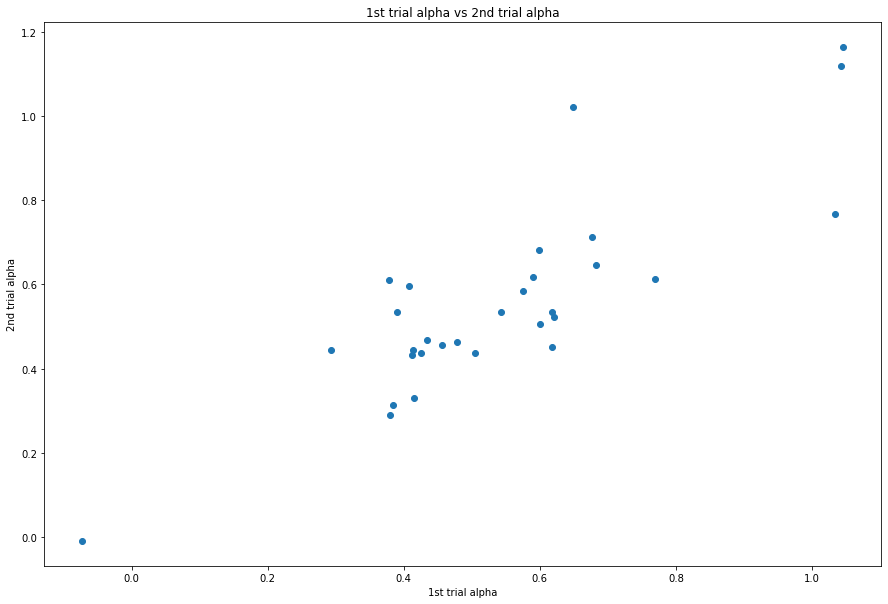

In [503]:
plt.figure(figsize=(15, 10))
plt.scatter(plot_df.loc[1, "alpha"], plot_df.loc[2, "alpha"])
plt.title("1st trial alpha vs 2nd trial alpha")
plt.xlabel("1st trial alpha")
plt.ylabel("2nd trial alpha")
plt.show()


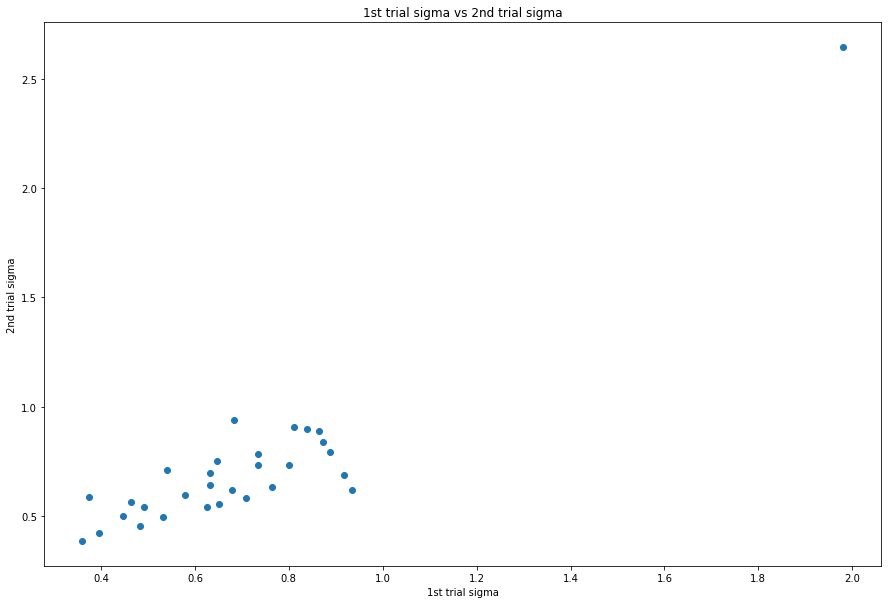

In [504]:
plt.figure(figsize=(15, 10))
plt.scatter(plot_df.loc[1, "sigma"], plot_df.loc[2, "sigma"])
plt.title("1st trial sigma vs 2nd trial sigma")
plt.xlabel("1st trial sigma")
plt.ylabel("2nd trial sigma")
plt.show()


In [505]:
values_df.mean()


C:\Users\T-NWEI~1\AppData\Local\Temp/ipykernel_36716/2604160373.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  values_df.mean()


alpha    0.551453
sigma    0.714300
dtype: float64